# CSS 201.5 - CSS MA Bootcamp

## Python for Data Analysis

### Umberto Mignozzetti (UCSD)

---

## Recap

We learned:

1. `pandas` library for data analysis
2. Load data
3. Check data
4. Elementary operations: select variables, filter observations, etc

Matplotlib is the main package for data visualization in Python.

To create a data visualization with matplotlib, we need to load the data into Python. We will work here with the datasets `tips` and `PErisk`.

## Today

Plot data with

1. `matplotlib`

1. Understand plots

1. `seaborn`

## Install packages

If you need to install libraries, this is how you do it:

In [1]:
!pip install --upgrade pip --quiet
!pip install --upgrade matplotlib --quiet
!pip install --upgrade seaborn --quiet

## Loading libraries we will use

In [2]:
import pandas as pd

# Plotting data
from matplotlib import pyplot as plt
import seaborn as sns

# Auxiliary
import numpy as np # this is a library we use for working with matrices

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Note that I always start my analysis by loading the libraries!

## Loading datasets

**Political and Economic Risk Dataset**: Info on investment risks in 62 countries in 1992
- courts  : 0 = not independent; 1 = independent
- barb2   : Informal Markets Benefits
- prsexp2 : 0 = very high expropriation risk; 5 = very low
- prscorr2: 0 = very high bribing risk; 5 = very low
- gdpw2   : Log of GDP per capita

In [3]:
perisk = pd.read_csv('PErisk.csv')

# And to make the country names to be the index names
perisk = perisk.set_index('country')

## Loading datasets

**US Population Dataset**: Info about US population

In [4]:
# Note that I informed the read_csv about the fact that `year` is a date object!
uspop = pd.read_csv('uspop.csv', parse_dates = ['year'])

# And to set the years as index names
uspop = uspop.set_index('year')

## Loading datasets (Exercise)

Load this dataset https://raw.githubusercontent.com/umbertomig/CSSBootCamp/main/datasets/beer-prod-australia.csv

In [5]:
# Your code here (hint: adapt the uspop code)
beerprod = ...

## Loading datasets

**Tips Dataset**: Info about tips in a given pub
- totbill : Total Bill
- tip     : Tip
- sex     : F = female; M = male
- smoker  : Yes or No
- day     : Weekday
- time    : Time of the day
- size    : Number of people

In [6]:
tips = pd.read_csv('tips.csv')

## Exercise 

Check these datasets. What do we have in each of them?

In [7]:
## Your answer here
uspop.head()

,uspop
year,
1790-01-01,3.93
1800-01-01,5.31
1810-01-01,7.24
1820-01-01,9.64
1830-01-01,12.90


# Matplotlib

Matplotlib is the main package for data visualization in Python.

## Lineplots

The default plot done by matplotlib is the lineplot. This type of plot is well suited for displaying data that varies over time.

We assume we have the time in the x-axis and the values of the variables (e.g., stock prices, population, etc) in the y-axis.

Let us check how it works:

## Lineplots

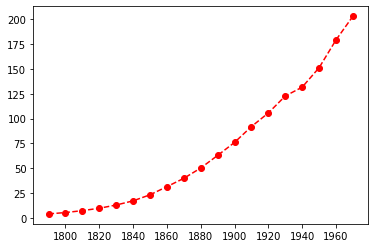

In [8]:
# My code here
fig, ax = plt.subplots()

ax.plot(uspop.index, uspop['uspop'], color = 'red', marker = 'o', linestyle = '--')

plt.show()

### Set Label Text

We can add labels using `set_xlabel` and `set_ylabel`.

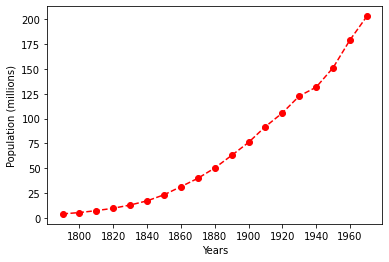

In [9]:
# My code here
fig, ax = plt.subplots()

ax.plot(uspop.index, uspop['uspop'], color = 'red', marker = 'o', linestyle = '--')

ax.set_xlabel('Years')

ax.set_ylabel('Population (millions)')

plt.show()

### Two plots in the same graph

Now, let us create the log of the population and add to the data:

In [10]:
# My code here
uspop['logpop'] = np.log(uspop['uspop'])
uspop.head()

,uspop,logpop
year,,
1790-01-01,3.93,1.368639
1800-01-01,5.31,1.669592
1810-01-01,7.24,1.979621
1820-01-01,9.64,2.265921
1830-01-01,12.90,2.557227


### Two plots in the same graph

We can put the plots together, changing the scale in the left and right hand sides. This is very useful to plot time series that have different axis values:

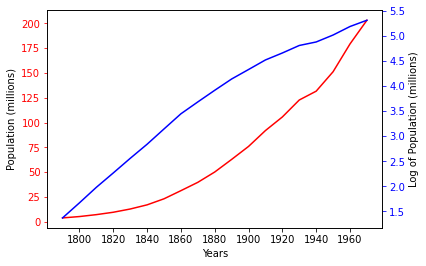

In [11]:
# My code here

fig, ax = plt.subplots()

ax.plot(uspop.index, uspop['uspop'], color = 'red')

ax.set_ylabel('Population (millions)')

ax.tick_params('y', colors = 'red')

ax.set_xlabel('Years')

ax2 = ax.twinx()

ax2.plot(uspop.index, uspop['logpop'], color = 'blue')

ax2.set_ylabel('Log of Population (millions)')

ax2.tick_params('y', colors = 'blue')

plt.show()

## Exercise

Create a lineplot of beer production in Australia. Do you see anything interesting?

In [12]:
# Your code here

## Bar-Charts

Bar-plots are useful to see the frequency in variables:

In [13]:
# My code here
perisk['exprisk'] = 5 - perisk['prsexp2']
tab = perisk['exprisk'].value_counts(sort = False)
tab

exprisk
4     6
0    14
5     2
1    14
2    19
3     7
Name: count, dtype: int64

## Bar-Charts

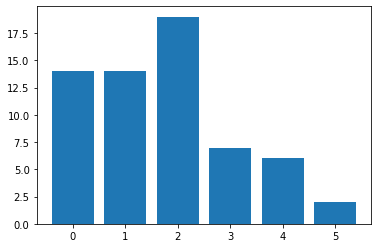

In [14]:
fig, ax = plt.subplots()

ax.bar(tab.index, tab)

plt.show()

## Bar-Charts

   obs  totbill   tip sex smoker  day   time  size
0    1    16.99  1.01   F     No  Sun  Night     2
1    2    10.34  1.66   M     No  Sun  Night     3
2    3    21.01  3.50   M     No  Sun  Night     3
3    4    23.68  3.31   M     No  Sun  Night     2
4    5    24.59  3.61   F     No  Sun  Night     4
day
Sat    0.356557
Sun    0.311475
Thu    0.254098
Fri    0.077869
Name: proportion, dtype: float64


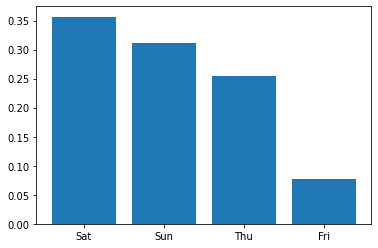

In [15]:
print(tips.head())
tab = tips['day'].value_counts(normalize = True)
print(tab)
fig, ax = plt.subplots()

ax.bar(tab.index, tab)

plt.show()

## Exercise

Do the same bar-chart with weekdays in the `tips` dataset.

In [16]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


## Histograms

To visualize numeric variables, the histogram is the best plot. For instance, here is a histogram of the log of gdp:

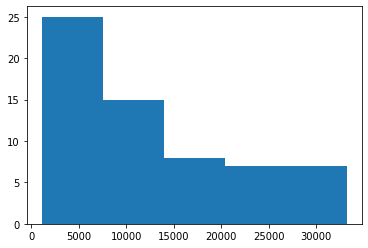

In [17]:
perisk['corrisk'] = 5 - perisk['prscorr2']
# My code here
fig, ax = plt.subplots()

ax.hist(np.exp(perisk['gdpw2']), bins = 5)

plt.show()

## Histograms

We can even add multiple variables to our plot:

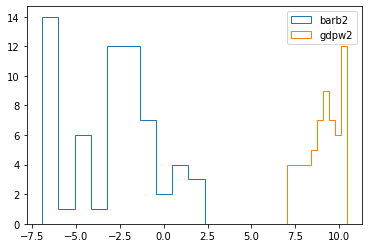

In [18]:
# My code here
fig, ax = plt.subplots()

ax.hist(perisk['barb2'], bins = 10, histtype = 'step', label = "barb2")

ax.hist(perisk['gdpw2'], bins = 10, histtype = 'step', label = "gdpw2")

ax.legend()

plt.show()

## Exercise

Create a histogram of tips and total bill.

In [19]:
## Your code here

## Box-plots

To visualize numeric variables, the box-plots are also great plots:

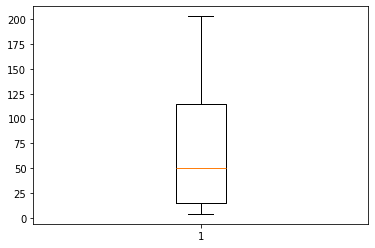

In [20]:
# My code here
fig, ax = plt.subplots()

ax.boxplot(uspop['uspop'])

plt.show()

## Exercise

Create a boxplot of tips and total bill.

In [21]:
## Your code here

## Scatter-plots

Scatter-plots are great to display numeric x numeric relationships.

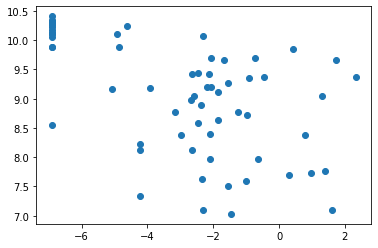

In [22]:
# My code here
fig, ax = plt.subplots()

ax.scatter(perisk['barb2'], perisk['gdpw2'])

plt.show()

## Exercise

Plot a scatter of total bill x tip in the tips dataset.

In [23]:
## Your code here

# Data Visualization with Seaborn

## Plotting Data 101

The best way to explore the data is to plot it. However, not all plots are suitable for the variables we want to describe. Starting with a single variable, the first question is what type of variable we are talking about?

Types of variables:

- `Quantitative` variables: represent measurement.
    
    + `Discrete`: number of children, age in years, etc.
    
    + `Continuous`: income, height, GDP per capita, etc.

- `Categorical` variables: represent discrete variation

    + `Binary`: voted for Trump, smokes or not, etc.
    
    + `Nominal`: species names, a candidate supported in the primaries, etc.
    
    + `Ordinal`: schooling, grade, risk, etc.

For each variable type, there are specific descriptive stats and plots. Below, see an example of the difference between using the `right` and `wrong` descriptive stats for continuous and binary variables.

## Summarize continuous (right)

In [24]:
# Summary stats for a continuous variable (good)
perisk['gdpw2'].describe()

count    62.000000
mean      9.041875
std       0.970264
min       7.029973
25%       8.381027
50%       9.185412
75%       9.889280
max      10.410180
Name: gdpw2, dtype: float64

## Summarize continuous (wrong)

In [25]:
# Frequency table for a continuous variable (bad)
perisk['gdpw2'].value_counts()

gdpw2
9.690170     1
9.882724     1
7.029973     1
9.178953     1
9.661735     1
            ..
8.392310     1
9.368114     1
9.891465     1
10.067770    1
7.965893     1
Name: count, Length: 62, dtype: int64

## Summarize discrete (wrong)

In [26]:
# Summary stats for a binary variable (bad)
perisk['courts'].describe()

count    62.000000
mean      0.451613
std       0.501716
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: courts, dtype: float64

## Summarize discrete (right)

In [27]:
# Frequency table for a binary variable (good)
perisk['courts'].value_counts()

courts
0    34
1    28
Name: count, dtype: int64

## Seaborn

**`Seaborn`** is a data visualization library built on the top of `matplotlib`. It was created by [Micheal Waskon at the Center for Neural Science, New York University](https://joss.theoj.org/papers/10.21105/joss.03021).

**`Seaborn`** has all the attributes of the `matplotlib` library (it is a child class), making it considerably easy to plot data using Python.

We will learn some of these plots in this class and a few customizations. More about `Seaborn` can be found in [here](https://seaborn.pydata.org).

## Seaborn

Below you can find a list of functions that we can use to plot data on `Seaborn`.

![alt image](https://seaborn.pydata.org/_images/function_overview_8_0.png)

## Univariate Plots

*Univariate plots* are plots for single variables.

### Quantitative Variables: Histograms

Starting with numerical variables, one suitable plot is the *histogram*. It breaks the numerical values into brackets and counts how many values are within each bracket.

The syntax is:

```
sns.displot(data = the_data_frame,
    x = 'the_variable',
    kind = 'hist',
    kde = [..True or False..], 
    rug = [..True or False..],
    bins = [..number of bins..], 
    stat : [..{"count", "density", "probability"}..],
    [..among others..])
```

## Histograms

Let's plot a histogram for the Log of GDP per capita (`gdpw2`)?

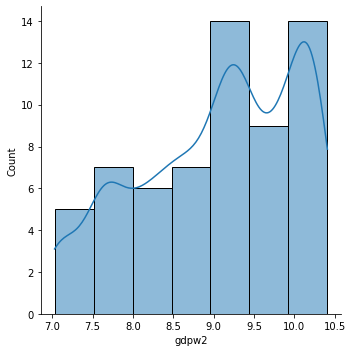

In [28]:
g = sns.displot(data = perisk, 
                x = 'gdpw2',
                kind = 'hist',
                kde = True,
                kde_kws = {'bw_adjust': 0.5})
plt.show()

## Customizations

We can easily customize the entire plot:

1. **Main title**: `plt.title('title here')`

2. **X-axis title**: `g.set_xlabels('text')` or `plt.xlabel('text')`

3. **Y-axis title**: `g.set_ylabels('text')` or `plt.ylabel('text')`

4. **Style**: 'white', 'dark', 'whitegrid', 'darkgrid', and 'ticks'. Usage: `sns.set_style('stylename')`

5. Remove the spine: `g.despine(left = True)`

6. **Current Palette + display the palette**: `sns.palplot(sns.color_palette())`

7. **Which palettes**: `sns.palettes.SEABORN_PALETTES` and to change, use `set_palette('palette')`

8. **Save figure**: instead of `plt.show()` use `plt.savefig('figname.png', transparent = False)`.

9. **Context**: set the context between 'paper', 'notebook', 'talk', and 'poster'. Use `sns.set_context('context here')`

There are even more customization that we can do. Please check the [seaborn documentation](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

## Histograms: Customizations

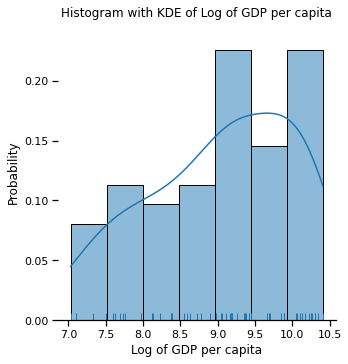

In [29]:
# My code here
sns.set_context('notebook')
g = sns.displot(data = perisk, 
                x = 'gdpw2', 
                kind = 'hist', 
                rug = True, 
                kde = True,
                stat = 'probability')
g.despine(left = True)
sns.set_style('dark')
g.set_xlabels('Log of GDP per capita')
plt.title('Histogram with KDE of Log of GDP per capita')
plt.show()

## Exercise

Using the histogram, describe the variables `totbill` and `tip` in the `tips` dataset.

In [30]:
## Your code here

## Categorical Variables: Countplot

Countplots are suitable for displaying categorical variables. 

The syntax is:

```
sns.catplot(
    data = the_data_frame,
    x = 'the_variable', 
    kind = 'count')
```

## Categorical Variables: Countplot

Let's check the risk of expropriation in each of the countries in 1992.

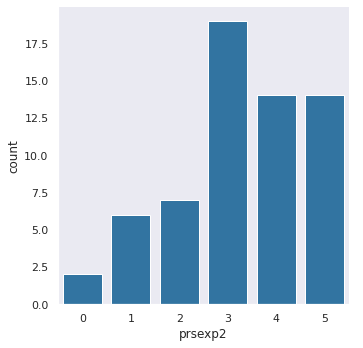

In [31]:
# My code here
sns.catplot(
    data = perisk, 
    x = 'prsexp2', 
    kind = 'count')
plt.show()

### Categorical Variables: Countplot

All the customizations that we learn apply here as well. We can use them to prettify this plot. 

However, since the scale is out of order, we can change the order of the x-axis values using the `order` parameter. 

Even more, for `ordinal` data, it is customary to use a sequential color scheme, i.e., it gets darker as we increase the categories. 

We can use several palettes:

1. `Blues`
2. `Greys`
3. `PuRd`: Light Purple to Dark Red
4. `GnBu`: Light Green to Dark Blue

Among others. The syntax to create the color scheme is:

```
sns.set_palette(
    sns.color_palette("color_scheme", # If want revert add '_r'
                      [..number_of_colors or as_cmap=True..])
)
```

For more about color palettes, please check [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Categorical Variables: Countplot

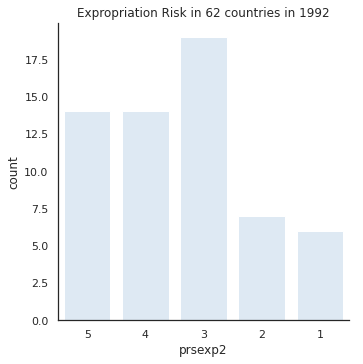

In [32]:
# My code here
sns.set_palette(sns.color_palette("Blues", 6))
sns.set_style('white')
cat_order = [5, 4, 3, 2, 1]
sns.catplot(x = 'prsexp2', 
            data = perisk, 
            kind = 'count', 
            order = cat_order)
plt.title('Expropriation Risk in 62 countries in 1992')
plt.show()
sns.set_palette('colorblind')

## Exercise

Do a countplot for the days (`day`) in the `tips` dataset.

In [33]:
## Your answer here

## Bivariate Plots

Univariate plots are excellent. But in reality, most of the exciting questions in science come from combinations of multiple variables (e.g., cause and effect, correlations, relationships, etc). 

For two variables' plots there are three combinations:

- **discrete x discrete**: mosaic plot

- **discrete x continuous**: several useful types

- **continuous x continuous**: scatterplots

## Discrete x Discrete Variables: Mosaicplot

The mosaic plot gives an idea of how the ratio of one variable changes when we change another variable. For instance, one empirical question that we can ask about the `perisk` dataset is:

**Do countries with independent courts have less corruption than countries without independent courts?**

The code to test this idea takes two steps. First, we need to prep the data. Then, we plot the data using the `kind = 'bar'` in the `catplot` function.

We need to create a table with cumulative values for the two variables we want to study to prep the data. Here is an example of how to do that:

```
tab = pd.crosstab(df.v1, df.v2, normalize='index') # 1: Crosstab
tab = tab.cumsum(axis = 1).\     # 2: Cummulative sum
      stack().\                  # 3: Stack the results
      reset_index(name = 'dist') # 4: Reset the indexes
tab
```

## Bivariate Plots

Then, we need to plot the results using `catplot`:

```
sns.catplot(data = tab,
            x = 'v1', # More variation here
            y = 'dist', # Proportions
            hue = 'v2', # Less variation here
            # Comment hue_order if not displaying well
            hue_order = tab.v2.unique()[::-1], 
            dodge = False,
            kind = 'bar')
plt.show()
```

*Full disclosure*: A function exists that builds mosaic plots in one line of code. However, I find the results very ugly. You can Google `mosaic plot in python` and check that yourself.

## Bivariate Plots

Prepping the data:

In [34]:
tab = pd.crosstab(perisk.prscorr2, perisk.courts, normalize = 'index')
tab = tab.cumsum(axis = 1).\
      stack().\
      reset_index(name = 'dist')
tab

,prscorr2,courts,dist
0,0,0,1.000000
1,0,1,1.000000
2,1,0,1.000000
3,1,1,1.000000
4,2,0,0.722222
5,2,1,1.000000
6,3,0,0.272727
7,3,1,1.000000
8,4,0,0.250000
9,4,1,1.000000


## Bivariate Plots

Doing the plot:

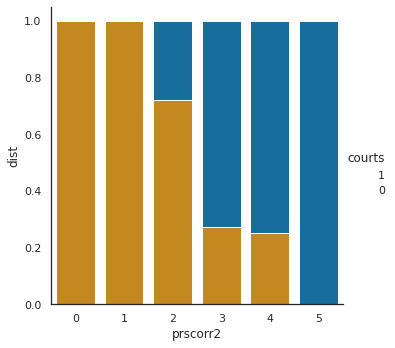

In [35]:
sns.catplot(data = tab,
            x = 'prscorr2', # More variation here
            y = 'dist',     # Proportions
            hue = 'courts', # Less variation here
            # Comment here if not displaying well
            hue_order = tab.courts.unique()[::-1], 
            dodge = False,
            kind = 'bar',
            legend_out = True)
plt.show()

## Exercise

Do the number of smokers (variable `smoker`) vary by the weekday (`day`)?

In [36]:
## Your answers here
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


## Discrete x Continuous Variables: Boxplots, Swarmplots, Violinplots

Suppose we want to test whether the data distribution varies based on a categorical variable. For example:

**Do you think that having an independent judiciary affects the GDP per capita of a country?**

We can check if this hypothesis makes sense by looking into the distribution of GDP per capita and segmenting it by the type of judicial institution.

The syntax for building these plots is almost the same as making a single boxplot. The difference is that you add the categorical variable to one of the axes:

```
sns.catplot(
    data = data_set, 
    x = 'categorical_variable',
    y = 'continuous_variable',
    kind = 'box') # Or 'violin', 'swarm', 'boxen', 'bar'..
```

## Discrete x Continuous Variables: Boxplots, Swarmplots, Violinplots

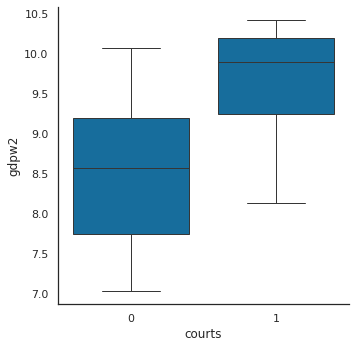

In [37]:
# My code here
sns.catplot(x = 'courts', 
            y = 'gdpw2', 
            data = perisk, 
            kind = 'box')
plt.show()

## Exercise

Are the tips from smokers higher than tips from non-smokers? (the idea is that smokers would compensate non-smokers for the externality caused) 

Check that in the `tips` dataset.

In [38]:
## Your answers here

## Continuous x Continuous Variables: Scatterplots and Regplots

To plot two continuous variables, one against the other, we can use two functions. First, we can use the `relplot` function if we want to explore the relationship without fitting any trend line. The syntax is the following:

```
sns.relplot(data = data_set,
            x = 'independent_axis_continuous_variable',
            y = 'dependent_axis_continuous_variable',
            hue = 'optional_categorical_to_color',
            kind = 'scatter')
```

## Continuous x Continuous Variables: Scatterplots and Regplots

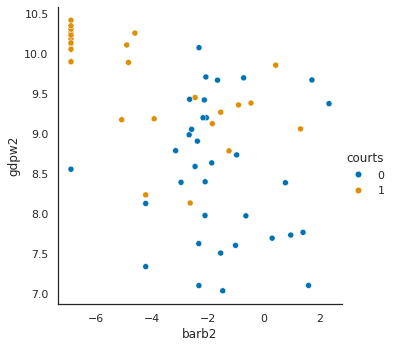

In [39]:
sns.relplot(data = perisk,
            x = 'barb2',
            y = 'gdpw2',
            hue = 'courts',
            kind = 'scatter')
plt.show()

## Continuous x Continuous Variables: Scatterplots and Regplots

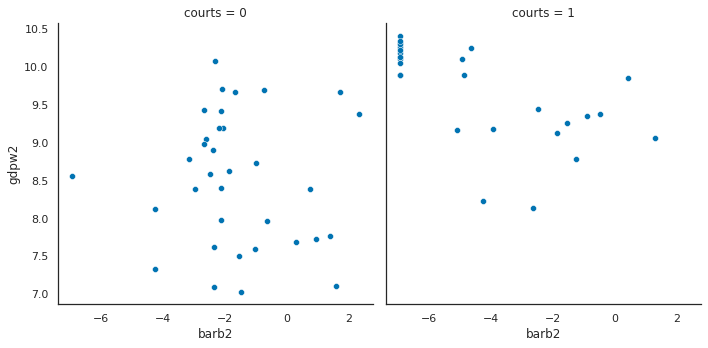

In [40]:
# Or maybe you want to see it in two different plots
sns.relplot(data = perisk,
            x = 'barb2',
            y = 'gdpw2',
            col = 'courts',
            kind = 'scatter')
plt.show()

## Continuos x Continuous

And an excellent version of it, with distribution plots on the top and the left, can be built using the `jointplot` function:

```
sns.jointplot(data = data_set,
              x = 'independent_axis_continuous_variable',
              y = 'dependent_axis_continuous_variable',
              hue = 'optional_categorical_to_color',
              kind = 'scatter') # Or 'scatter', 'kde', 'hist', 'hex', 'reg', 'resid'
```


## Continuous x Continuous

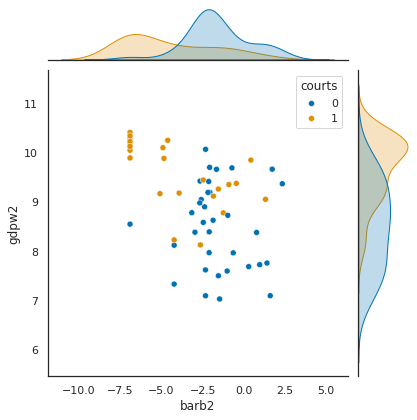

In [41]:
sns.jointplot(data = perisk,
              x = "barb2", 
              y = "gdpw2",
             hue = 'courts')
plt.show()

## Continuous x Continuous

If you want to add a trend line, it is better to use `lmplot` (instead of 'reg' in the plot above). The syntax is the following:

```
sns.lmplot(data = data_set,
    x = "total_bill", 
    y = "tip", 
    hue = "smoker",
    logistic = ..False or True.., # Logistic fit for discrete y
    order = ..polynomial order.., # Polynomial degree
    lowess = ..False or True..,   # Lowess fit
    ci = ..None..)                # Remove conf. int.
```

## Continuous x Continuous

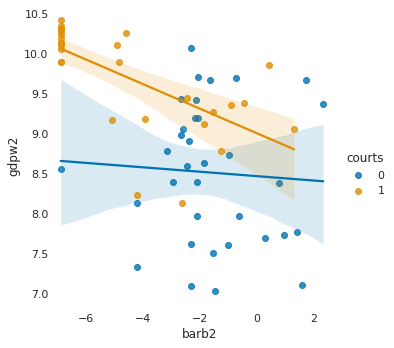

In [42]:
g = sns.lmplot(data = perisk,
           x = "barb2", 
           y = "gdpw2", 
           hue = "courts")
g.despine(left = True, bottom = True)
plt.xlim(-7, 3)
plt.show()

## Exercise

Are the tips related with total bill in the `tips` dataset?

In [43]:
## Your answers here

# Great job!!!

## Extras

Excellent job learning `seaborn`! It is an easy-to-use yet powerful package to generate lovely plots.

Next, you should take a look at the following packages to keep developing your skills:

- [`plotnine`](https://plotnine.readthedocs.io/en/stable/index.html#): Implements the ggplot *grammar of graphs* in python

- [`cartopy`](https://github.com/SciTools/cartopy): Package to make maps in python.

- [`plotly`](https://plotly.com): Builds interactive graphs in python (and other languages). Check also the [`dash`](https://dash.plotly.com/introduction) for plotly in python.

In [44]:
## Extra Datasets

## Political Information Dataset
# ANES 2000 Political Information based on interviews
# polInf          : Political Information
# collegeDegree   : College Degree
# female          : Female
# age             : Age in years
# homeOwn         : Own house
# others...
polinf = pd.read_csv('https://raw.githubusercontent.com/umbertomig/CSSBootCamp/main/datasets/pinf.csv')
pinf_order = ['Very Low', 'Fairly Low', 'Average', 'Fairly High', 'Very High']
polinf['polInf'] = pd.Categorical(polinf.polInf, 
                                  ordered=True, 
                                  categories=pinf_order)
print(polinf.head())

## US Crime data in the 1970's
# Data on violent crime in the US
# Muder: number of murders in the state
# Assault: number of assaults in the state
# others...
usarrests = pd.read_csv('https://raw.githubusercontent.com/umbertomig/CSSBootCamp/main/datasets/usarrests.csv')
print(usarrests.head())

        polInf collegeDegree female   age homeOwn govt     length  id
0  Fairly High           Yes     No  49.0     Yes   No  58.400002   1
1      Average            No    Yes  35.0     Yes   No  46.150002   2
2    Very High            No    Yes  57.0     Yes   No  89.519997   3
3      Average            No     No  63.0     Yes   No  92.629997   4
4  Fairly High           Yes    Yes  40.0     Yes   No  58.849998   4
   Murder  Assault  UrbanPop  Rape
0    13.2      236        58  21.2
1    10.0      263        48  44.5
2     8.1      294        80  31.0
3     8.8      190        50  19.5
4     9.0      276        91  40.6


### Exercises

1. (Univariate) In the `polinf` dataset, make a count plot of the variable `polInf`. Imagine you want to use this for a talk, so adjust the context. Change the x-axis label and title to appropriate descriptions of the data. (Hint: to rotate the axis tick labels, use `plt.xticks(rotation=number_degree_of_your_choice)`)

2. (Univariate) In the `polinf` dataset, make a histogram of the variable `age`.

3. (Bivariate) Do you think political information varies with a college degree? Check that using the `polinf` dataset!

4. (Bivariate) Do you think political information varies with age? Check that using the `polinf` dataset!

5. (Bivariate) Do you think there is a correlation between `Murder` and `Assault`? Check that using the `usarrests` dataset!

6. (Challenge: Multivariate) There are four continuous indicators in the `usarrests` dataset: `Murder`, `Assault`, `UrbanPop`, and `Rape`. Do you think you can build a scatterplot matrix? The documentation is in [here](https://seaborn.pydata.org/examples/scatterplot_matrix.html).

In [45]:
# Your answers here

**Great job!!!**